In [1]:
import sys,os
sys.path.append(os.path.join(os.path.dirname('__file__'), 'freesound-python/'))

from utilities import *
import numpy as np
from matplotlib import pyplot as plt
import math
import essentia.standard as ess
from sklearn.preprocessing import normalize


In [2]:
params=AnalysisParams(200,100,'hann',2048,44100,12)
numBins = params.numBins

audioDir = 'audio/'
annotationsDir = 'scale_annotations/'
dataDir = 'data/'

['altered', 'dorian', 'hminor', 'hwdiminished', 'locrian', 'lydian', 'lydianb7', 'major', 'minor', 'mixolydian', 'mminor', 'phrygian']
[4.9012823104858398, 4.9344722884041925, 3.6965090206691196, 5.1646593809127808, 3.6661851746695384, 6.7407097816467285, 7.6839064189365933, 5.6685259682791571, 4.6397056579589844, 6.6117226055690219, 3.9912756511143277, 2.8582671029227122]
Maximum Likeliest Scale of Phrase :lydianb7    with likeliest : 0.126886707253


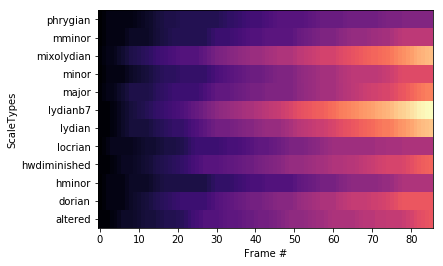

In [5]:
VisualizeScaleLikelihoods('toprak_lydianb7',1,2)

['altered', 'dorian', 'hminor', 'hwdiminished', 'locrian', 'lydian', 'lydianb7', 'major', 'minor', 'mixolydian', 'mminor', 'phrygian']


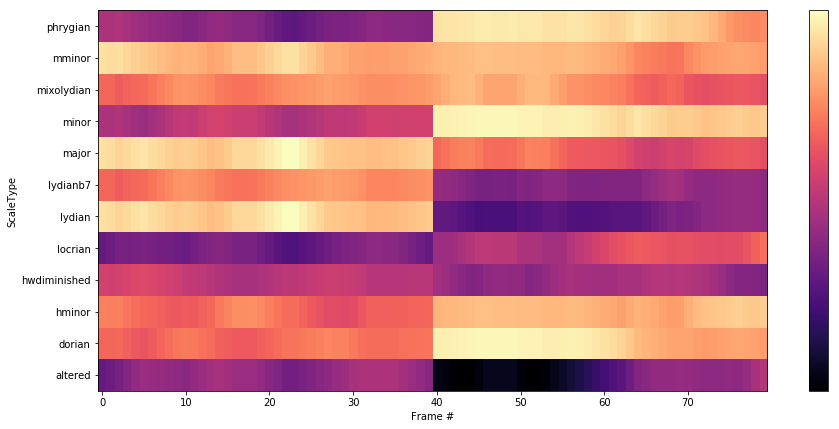

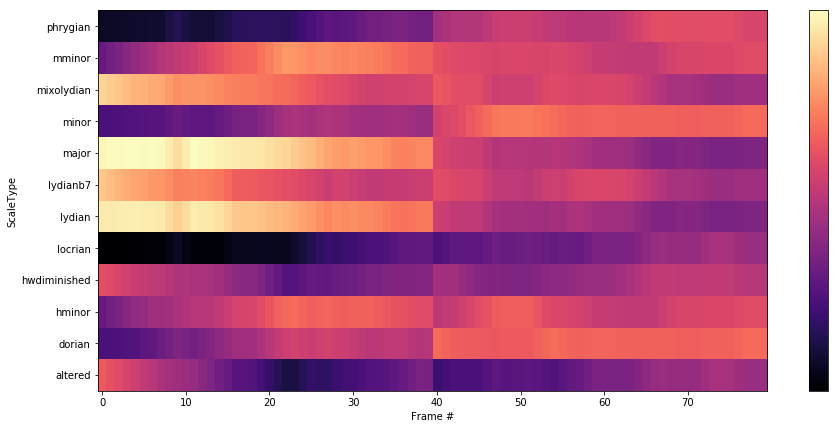

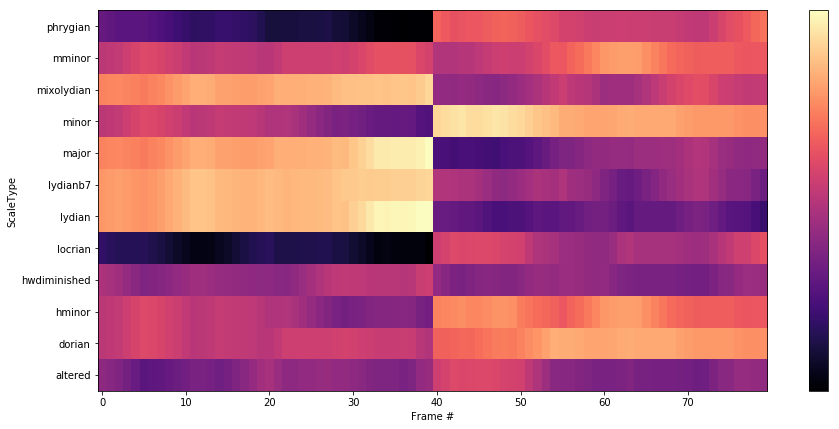

In [8]:
fileDir = 'chord-scale_exercise/'
singleFeatures = FeatureExtraction_single('scalesexercise_solo1.mp3',fileDir,params,'exercise.json')



#frame parameters for temporal likelihood estimation
winSize = 50
hopSize = 10
likelihoodsParts = []
for i in range(len(singleFeatures)):
    likelihoods = []
    hpcpVec = np.concatenate((singleFeatures['Part'+str(i+1)]['hpcp'],np.zeros((winSize-hopSize,12))),axis = 0)
    #print(hpcpVec)
    for k in range(len(singleFeatures['Part'+str(i+1)]['hpcp'])):
        hpcpAgg = np.zeros_like(hpcpVec[0])
        for l in range(winSize-hopSize):
            hpcpAgg = hpcpAgg + hpcpVec[k+l]
            #print(hpcpAgg)
        maxscalelike, likelihood = maxlikelihood2(hpcpAgg)
        framelikelihoods = []
        for j in range(len(likelihood)):
            framelikelihoods.append(likelihood[j][1]['likelihood'])
        framelikelihoods = normalize(np.array(framelikelihoods).reshape(1,-1),norm = 'l1')
        framelikelihoods = framelikelihoods[0]
        likelihoods.append(framelikelihoods)    
    likelihoodsParts.append(likelihoods)
scaletypes = ['altered', 'dorian', 'hminor', 'hwdiminished', 'locrian', 'lydian', 'lydianb7', 'major', 'mixolydian','minor', 'mminor', 'phrygian']
sc = sorted(scaletypes)
print(sc)



#print(likelihoods) 
length =int(len(likelihoodsParts)/2)

for i in range(length):
    likelihoodConcat = np.concatenate((likelihoodsParts[2*i][:(winSize-hopSize)],likelihoodsParts[2*i+1][:(winSize-hopSize)]),axis = 0)
    fig = plt.figure(figsize=(15,7))
    figure = plt.imshow(np.transpose(likelihoodConcat),aspect = 'auto',interpolation = 'nearest',origin = 'lower',cmap = 'magma',norm=plt.Normalize())
    plt.xlabel('Frame #')
    plt.ylabel('ScaleType')
    tick_marks = np.arange(len(sc))
    plt.yticks(tick_marks, sc)
    cbar = fig.colorbar(figure,  ticks=[0, 0.5, 1])
    cbar.ax.set_yticklabels(['0', '0.5', '1'])
    plt.show() 

In [9]:
ScaleTemplates = dict()
ScaleTemplates['major'] = {'scaleArray':[1,0,1,0,1,1,0,1,0,1,0,1]}
ScaleTemplates['dorian'] = {'scaleArray':[1,0,1,1,0,1,0,1,0,1,1,0]}
ScaleTemplates['phrygian'] = {'scaleArray':[1,1,0,1,0,1,0,1,1,0,1,0]}
ScaleTemplates['lydian'] = {'scaleArray':[1,0,1,0,1,0,1,1,0,1,0,1]}
ScaleTemplates['mixolydian'] = {'scaleArray':[1,0,1,0,1,1,0,1,0,1,1,0]}
ScaleTemplates['minor'] = {'scaleArray':[1,0,1,1,0,1,0,1,1,0,1,0]}
ScaleTemplates['locrian'] = {'scaleArray':[1,1,0,1,0,1,1,0,1,0,1,0]}
ScaleTemplates['lydianb7'] = {'scaleArray':[1,0,1,0,1,0,1,1,0,1,1,0]}
ScaleTemplates['altered'] = {'scaleArray':[1,1,0,1,1,0,1,0,1,0,1,0]}
ScaleTemplates['mminor'] = {'scaleArray':[1,0,1,1,0,1,0,1,0,1,0,1]}
ScaleTemplates['hminor'] = {'scaleArray':[1,0,1,1,0,1,0,1,1,0,0,1]}
ScaleTemplates['hwdiminished'] = {'scaleArray':[1,1,0,1,1,0,1,1,0,1,1,0]}
ScaleTemplates['wholetone'] = {'scaleArray':[1,0,1,0,1,0,1,0,1,0,1,0]}
ScaleTemplates['chromatic'] = {'scaleArray':[1,1,1,1,1,1,1,1,1,1,1,1]}


Part1


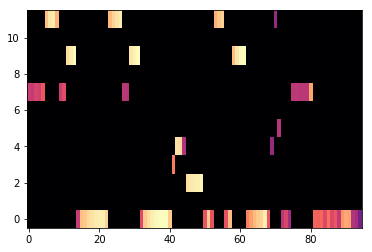

Inscale rate is = 
99.0065386285
Outscale rate is = 
0.993463112859
Likelies scaleType in Part1
major
The correctness of Chosen Scale Type : 
100.0
Number of In-scale Notes Played :
7
[0.36844096, 0.0, 0.049204931, 0.0074385619, 0.028428309, 0.0051095849, 0.0, 0.086139776, 0.0, 0.09838023, 0.0, 0.10560835]


Part2


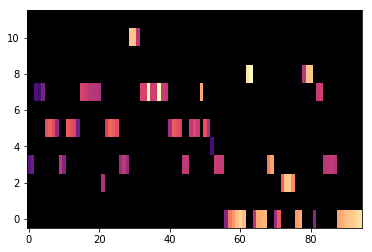

Inscale rate is = 
99.6238450877
Outscale rate is = 
0.376153159512
Likelies scaleType in Part2
minor
The correctness of Chosen Scale Type : 
100.0
Number of In-scale Notes Played :
7
[0.17184858, 0.0, 0.037741058, 0.093669191, 0.0022984431, 0.12456319, 0.0, 0.11454516, 0.043166425, 0.0, 0.023207108, 0.0]


Part3


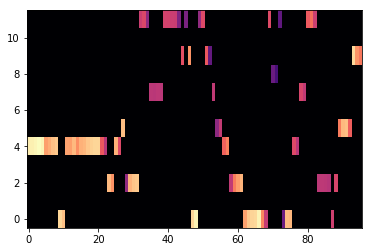

Inscale rate is = 
99.1808266618
Outscale rate is = 
0.819173682309
Likelies scaleType in Part3
major
The correctness of Chosen Scale Type : 
100.0
Number of In-scale Notes Played :
7
[0.12298081, 0.0, 0.10362277, 0.0, 0.22351034, 0.050140154, 0.0, 0.03758182, 0.0055432902, 0.048459392, 0.0, 0.084854327]


Part4


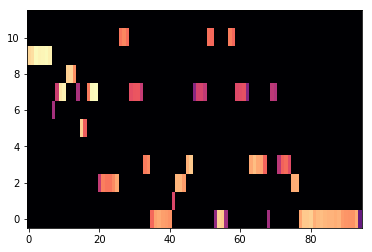

Inscale rate is = 
88.9392354831
Outscale rate is = 
11.0607641326
Likelies scaleType in Part4
dorian
The correctness of Chosen Scale Type : 
85.71428571428571
Number of In-scale Notes Played :
7
[0.22930191, 0.0060863332, 0.08649303, 0.099538736, 0.0, 0.016012179, 0.0047037029, 0.13766612, 0.026546983, 0.069615074, 0.050975841, 0.0]


Part5


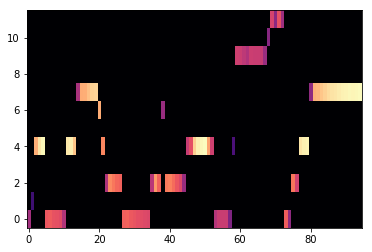

Inscale rate is = 
97.1945620708
Outscale rate is = 
2.80544575116
Likelies scaleType in Part5
lydian
The correctness of Chosen Scale Type : 
85.71428571428571
Number of In-scale Notes Played :
6
[0.12854119, 0.0021002633, 0.1049659, 0.0, 0.16015092, 0.0, 0.012657328, 0.18599042, 0.0, 0.047821909, 0.003948092, 0.020587346]


Part6


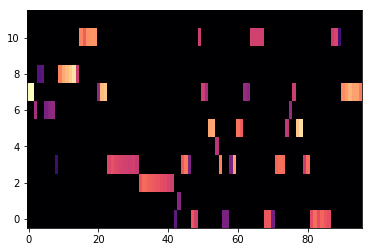

Inscale rate is = 
95.0152397669
Outscale rate is = 
4.98475497173
Likelies scaleType in Part6
minor
The correctness of Chosen Scale Type : 
100.0
Number of In-scale Notes Played :
7
[0.077211142, 0.0039511034, 0.063252747, 0.12403792, 0.0050857118, 0.053554844, 0.020522051, 0.11281949, 0.05349474, 0.0, 0.079055548, 0.0]




In [22]:
for i in range(len(singleFeatures)):
    part = singleFeatures['Part'+str(i+1)]
    print(part['name'])
    HPCPvec = part['mean_hpcp_vector']
    HPCParray = part['hpcp']
    scaleType = part['scaleType']
    scaleTemplate = ScaleTemplates[scaleType]['scaleArray']
    
    maxscalelike, likelihood = maxlikelihood2(HPCPvec)
    gradeScale = cosine_similarity(ScaleTemplates[maxscalelike[0][0]]['scaleArray'],scaleTemplate) 
    
    inscaleVector = np.multiply(HPCPvec,scaleTemplate)
    outscaleVector = np.multiply(HPCPvec,(1-np.array(scaleTemplate)))
    numberofInScaleNotes = 0
    for i in range(len(inscaleVector)):
        if inscaleVector[i] > 0:
            numberofInScaleNotes = numberofInScaleNotes + 1
    #grade = np.sum(HPCPvec)
    figure = plt.imshow(np.transpose(HPCParray),aspect = 'auto',interpolation = 'nearest',origin = 'lower',cmap = 'magma',norm=plt.Normalize())
    plt.show()
    print('Inscale rate is = ')
    print(np.sum(inscaleVector)/np.sum(HPCPvec)*100)
    print('Outscale rate is = ')
    print(np.sum(outscaleVector)/np.sum(HPCPvec)*100)
    
    print('Likelies scaleType in '+ part['name'])
    print(maxscalelike[0][0])
    print('The correctness of Chosen Scale Type : ')
    print(gradeScale*100)
    
    print('Number of In-scale Notes Played :')
    print(numberofInScaleNotes)
    print(HPCPvec)
    print('\n')

In [ ]:
a1=np.array(ScaleTemplates['wholetone']['scaleArray'])
a2=np.array(ScaleTemplates['chromatic']['scaleArray'])

cosine_similarity(a1,a2)

In [ ]:
###SINGLE FILE OPERATION
data1 = data['hikmet_phrygian']
ChromaMean = data1[0]['mean_hpcp_vector']
ChromaMean
maxlike,likelihoods = maxlikelihood(ChromaMean)

In [ ]:
###BATCH OPERATION
for audioFile in data.items():
    for audioSegment in audioFile[1]:   
        print(audioSegment['name'])
        maxlikelihood(audioSegment['mean_hpcp_vector'])
        print(audioSegment['mean_hpcp_vector'])